In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your folder
path_to_folder = "/content/drive/MyDrive/Research_Project_AQI_ExTR_Finalized_Datasets/Classification_Completed_Datasets"

averaged_resultant_rfc_dataset = pd.read_csv(f"{path_to_folder}/completed_dataset_rfc.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: in this averaged_resultant_rfc_dataset, for values in each column that are below 0, replace it with the minimum non-negative alue for the respective column

cols = ['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene']

for col in averaged_resultant_rfc_dataset.columns:
    if col in cols:
        min_non_negative = averaged_resultant_rfc_dataset[col][averaged_resultant_rfc_dataset[col] >= 0].min()
        if min_non_negative is not None:
            averaged_resultant_rfc_dataset.loc[averaged_resultant_rfc_dataset[col] < 0, col] = min_non_negative
        else:
            # Handle cases where all values in the column are negative
            print(f"All values in column '{col}' are negative. No suitable replacement found.")
            # You might choose to fill with 0 or another default value in this case:
            # averaged_resultant_rfc_dataset.loc[averaged_resultant_rfc_dataset[col] < 0, col] = 0

averaged_resultant_rfc_dataset.head()


City             Datetime   PM2.5    PM10      NO    NO2     NOx    NH3  \
0  Delhi  2015-01-01 16:00:00  211.51  340.66   13.09  37.08   47.07  33.54   
1  Delhi  2015-01-01 17:00:00  191.12  257.40   15.44  38.40   51.24  34.98   
2  Delhi  2015-01-01 18:00:00  218.44  351.01   22.85  44.73   59.26  34.80   
3  Delhi  2015-01-01 19:00:00  296.80  600.95   69.20  47.76  101.68  34.25   
4  Delhi  2015-01-01 20:00:00  336.43  714.63  148.42  46.31  171.10  35.75   

      CO    SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  \
0  15.24  12.33  34.35     3.51     5.85    4.73  456.0     Severe   
1  13.11  18.00  34.38     3.58     5.23    3.78  450.0     Severe   
2  18.35  19.17  38.42     3.67     5.93    4.98  446.0     Severe   
3  16.67  21.50  49.12    14.75    27.13    8.78  475.0     Severe   
4  12.17  17.67  56.44    26.56    45.62    9.99  480.0     Severe   

         Date      Time  
0  2015-01-01  16:00:00  
1  2015-01-01  17:00:00  
2  2015-01-01  18:00:00  
3  2015-01-01  19:00:00  
4  2015-01-01  20:00:00

In [ ]:
# prompt: show max, min, etc for each column in "cols = ['PM2.5',
#  'PM10',
#  'NO',
#  'NO2',
#  'NOx',
#  'NH3',
#  'CO',
#  'SO2',
#  'O3',
#  'Benzene',
#  'Toluene',
#  'Xylene']"

for col in cols:
  print(f"Column: {col}")
  print(f"  Max: {averaged_resultant_rfc_dataset[col].max()}")
  print(f"  Min: {averaged_resultant_rfc_dataset[col].min()}")
  print(f"  Mean: {averaged_resultant_rfc_dataset[col].mean()}")
  print(f"  Median: {averaged_resultant_rfc_dataset[col].median()}")
  print(f"  Standard Deviation: {averaged_resultant_rfc_dataset[col].std()}")
  print("-" * 20)


Column: PM2.5
  Max: 938.5
  Min: 0.05
  Mean: 117.11282017677648
  Median: 86.83999999999999
  Standard Deviation: 95.06933898138018
--------------------
Column: PM10
  Max: 1000.0
  Min: 1.2096688775024138
  Mean: 226.9201041630789
  Median: 199.13
  Standard Deviation: 146.9667585688851
--------------------
Column: NO
  Max: 497.3999999999999
  Min: 0.05
  Mean: 39.091326152324164
  Median: 19.09
  Standard Deviation: 50.256406924907196
--------------------
Column: NO2
  Max: 337.82
  Min: 1.2822684007489922
  Mean: 50.65079971164434
  Median: 44.15
  Standard Deviation: 28.111175232607344
--------------------
Column: NOx
  Max: 433.78
  Min: 0.0
  Mean: 58.56520426802402
  Median: 42.515
  Standard Deviation: 48.91099633634833
--------------------
Column: NH3
  Max: 485.52
  Min: 0.1340994461841672
  Mean: 41.87383243814538
  Median: 37.28
  Standard Deviation: 20.344546162173017
--------------------
Column: CO
  Max: 47.42
  Min: 0.0
  Mean: 1.9844359069094626
  Median: 1.1
  Stan

In [ ]:

# Check for NaN values
averaged_resultant_rfc_dataset.isna().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Date          0
Time          0
dtype: int64

In [ ]:
feature_columns_all = averaged_resultant_rfc_dataset.columns.tolist()
features_to_remove = ['City', 'Datetime', 'AQI', 'AQI_Bucket', 'Date', 'Time']
feature_cols = [col for col in feature_columns_all if col not in features_to_remove]

feature_cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene']

In [ ]:
# sort by "Datetime" column
averaged_resultant_rfc_dataset = averaged_resultant_rfc_dataset.sort_values(by="Datetime")

averaged_resultant_rfc_dataset

City             Datetime   PM2.5        PM10      NO    NO2     NOx  \
47694  Delhi  2015-01-01 01:00:00  454.58  935.180000   81.52  41.78  187.66   
47695  Delhi  2015-01-01 02:00:00  440.44  874.220879   70.80  43.46  176.83   
47696  Delhi  2015-01-01 03:00:00  409.09  842.413294  132.46  41.19  141.02   
47697  Delhi  2015-01-01 04:00:00  436.12  881.655247   84.78  39.55  102.84   
47698  Delhi  2015-01-01 05:00:00  415.88  976.990000   60.24  37.41   80.12   
...      ...                  ...     ...         ...     ...    ...     ...   
47689  Delhi  2020-06-30 20:00:00   43.19  123.260000    6.33  22.28   17.66   
47690  Delhi  2020-06-30 21:00:00   45.30  125.220000    6.34  22.91   17.96   
47691  Delhi  2020-06-30 22:00:00   49.04  129.390000    6.29  20.95   16.80   
47692  Delhi  2020-06-30 23:00:00   50.51  128.860000    6.19  20.40   16.83   
47693  Delhi  2020-07-01 00:00:00   54.01  128.660000    6.33  21.05   16.81   

         NH3     CO    SO2     O3  Benzene  Toluene  Xylene         AQI  \
47694  27.54   9.29   3.41  54.94    25.24    58.57   13.80  526.280000   
47695  27.72  13.28   3.88  50.53    23.10    49.37   15.63  524.250000   
47696  28.94  29.67   2.83  19.33    19.04    38.94   17.18  487.350000   
47697  29.30  21.76   4.33  20.08    13.99    27.53   16.82  494.516667   
47698  30.84  26.19   6.17  16.00    11.14    21.99   14.29  477.496667   
...      ...    ...    ...    ...      ...      ...     ...         ...   
47689  29.92   0.92  10.64  44.13     1.63    17.83    0.86   97.000000   
47690  29.95   1.04  10.59  39.62     1.72    18.06    1.16   99.000000   
47691  30.01   1.00  10.20  38.95     1.66    16.17    1.18  101.000000   
47692  29.40   0.94  10.98  34.53     1.60    16.79    0.85  102.000000   
47693  29.06   0.97  11.15  29.73     2.03    23.57    0.65  101.000000   

         AQI_Bucket        Date      Time  
47694        Severe  2015-01-01  01:00:00  
47695        Severe  2015-01-01  02:00:00  
47696        Severe  2015-01-01  03:00:00  
47697        Severe  2015-01-01  04:00:00  
47698        Severe  2015-01-01  05:00:00  
...             ...         ...       ...  
47689  Satisfactory  2020-06-30  20:00:00  
47690  Satisfactory  2020-06-30  21:00:00  
47691      Moderate  2020-06-30  22:00:00  
47692      Moderate  2020-06-30  23:00:00  
47693      Moderate  2020-07-01  00:00:00  

[48192 rows x 18 columns]

In [ ]:
# Split the data into 80-20 ratio
from sklearn.model_selection import train_test_split

main_dataset = averaged_resultant_rfc_dataset.copy()
main_dataset.head()

City             Datetime   PM2.5        PM10      NO    NO2     NOx  \
47694  Delhi  2015-01-01 01:00:00  454.58  935.180000   81.52  41.78  187.66   
47695  Delhi  2015-01-01 02:00:00  440.44  874.220879   70.80  43.46  176.83   
47696  Delhi  2015-01-01 03:00:00  409.09  842.413294  132.46  41.19  141.02   
47697  Delhi  2015-01-01 04:00:00  436.12  881.655247   84.78  39.55  102.84   
47698  Delhi  2015-01-01 05:00:00  415.88  976.990000   60.24  37.41   80.12   

         NH3     CO   SO2     O3  Benzene  Toluene  Xylene         AQI  \
47694  27.54   9.29  3.41  54.94    25.24    58.57   13.80  526.280000   
47695  27.72  13.28  3.88  50.53    23.10    49.37   15.63  524.250000   
47696  28.94  29.67  2.83  19.33    19.04    38.94   17.18  487.350000   
47697  29.30  21.76  4.33  20.08    13.99    27.53   16.82  494.516667   
47698  30.84  26.19  6.17  16.00    11.14    21.99   14.29  477.496667   

      AQI_Bucket        Date      Time  
47694     Severe  2015-01-01  01:00:00  
47695     Severe  2015-01-01  02:00:00  
47696     Severe  2015-01-01  03:00:00  
47697     Severe  2015-01-01  04:00:00  
47698     Severe  2015-01-01  05:00:00

In [ ]:
X = main_dataset[feature_cols]
y = main_dataset['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np
import scipy
import pmdarima
import statsmodels

print("NumPy Version:", np.__version__)
print("SciPy Version:", scipy.__version__)
print("pmdarima Version:", pmdarima.__version__)
print("statsmodels Version:", statsmodels.__version__)


NumPy Version: 1.26.4
SciPy Version: 1.13.1
pmdarima Version: 2.0.4
statsmodels Version: 0.14.4


Optimal d for this series: 0


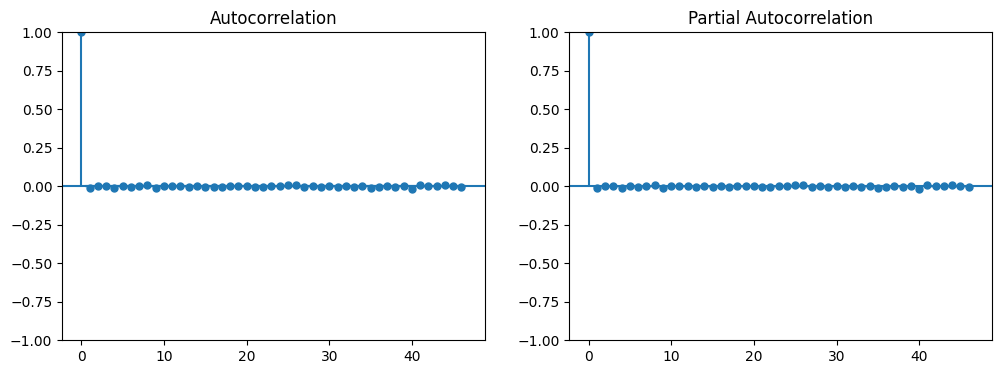

Optimal ARIMA order: (4, 0, 0)
Optimal d for this series: 0


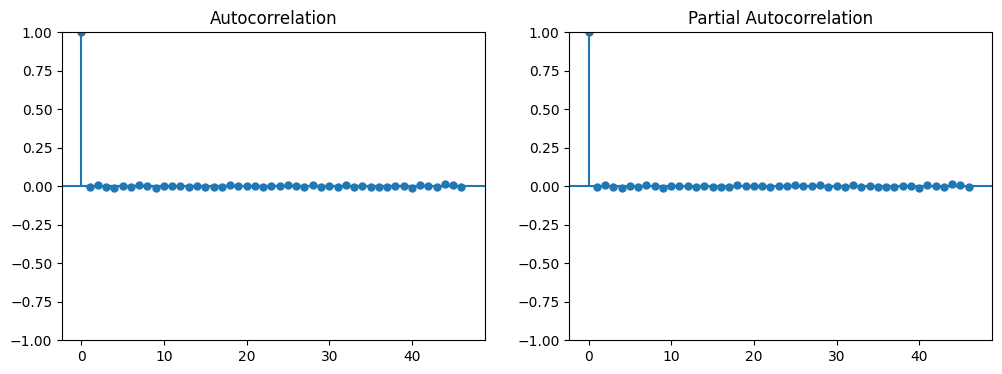

Optimal ARIMA order: (0, 0, 0)


In [ ]:
import pandas as pd
import numpy as np
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")

def find_optimal_arima_params(series):
    """Finds the optimal (p, d, q) for ARIMA using ADF test and AIC minimization."""

    # Step 1: Determine d using ADF Test
    result = adfuller(series)
    d = 0
    while result[1] > 0.05:  # If p-value > 0.05, apply differencing
        series = series.diff().dropna()
        result = adfuller(series)
        d += 1

    print(f"Optimal d for this series: {d}")

    # Step 2: Plot ACF and PACF to estimate p and q
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series, ax=axes[0])  # ACF for q
    plot_pacf(series, ax=axes[1])  # PACF for p
    plt.show()

    # Step 3: Grid Search for Best (p, d, q)
    p_values = range(0, 5)
    q_values = range(0, 5)
    best_aic = float("inf")
    best_order = None

    for p, q in itertools.product(p_values, q_values):
        try:
            model = sm.tsa.ARIMA(series, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)
        except:
            continue

    print(f"Optimal ARIMA order: {best_order}")
    return best_order

# Apply to 'PM2.5' and 'PM10'
optimal_params_pm25 = find_optimal_arima_params(X_train["PM2.5"])
optimal_params_pm10 = find_optimal_arima_params(X_train["PM10"])

In [ ]:
!pip install pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
import pmdarima as pm
import pandas as pd
import warnings

warnings.filterwarnings("ignore")


def apply_tuned_arima_residualization(
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    feature_cols: list,
    apply_to_cols: list,
    seasonal: bool = False,
):
    """
    Applies ARIMA residualization with per-feature order selection using auto_arima.

    IMPORTANT:
    - auto_arima is run on TRAINING DATA ONLY
    - ARIMA is treated as a tuned preprocessing step
    - Residuals are computed consistently for train and test
    """

    X_train = X_train[feature_cols].reset_index(drop=True).copy()
    X_test = X_test[feature_cols].reset_index(drop=True).copy()

    apply_to_cols = [c for c in apply_to_cols if c in feature_cols]

    train_out = {}
    test_out = {}
    arima_models = {}
    arima_orders = {}

    for col in feature_cols:
        if col in apply_to_cols:
            # --- Step 1: auto_arima on TRAIN ONLY ---
            auto_model = pm.auto_arima(
                X_train[col].dropna(),
                seasonal=seasonal,
                stepwise=True,
                suppress_warnings=True,
                error_action="ignore",
                trace=False,
            )

            best_order = auto_model.order
            arima_orders[col] = best_order
            print(f"Best ARIMA order for {col}: {best_order}")

            # --- Step 2: fit statsmodels ARIMA with chosen order ---
            model = ARIMA(X_train[col], order=best_order)
            model_fit = model.fit()
            arima_models[col] = model_fit

            # --- Step 3: training residuals ---
            train_out[col] = model_fit.resid.values

            # --- Step 4: proper out-of-sample residuals ---
            forecast = model_fit.get_forecast(steps=len(X_test))
            test_out[col] = forecast.resid.values

        else:
            train_out[col] = X_train[col].values
            test_out[col] = X_test[col].values

    # Convert to DataFrames
    X_train_processed = pd.DataFrame(train_out, columns=feature_cols)
    X_test_processed = pd.DataFrame(test_out, columns=feature_cols)

    # Standardize using training statistics
    scaler = StandardScaler()
    X_train_processed.loc[:, :] = scaler.fit_transform(X_train_processed)
    X_test_processed.loc[:, :] = scaler.transform(X_test_processed)

    return X_train_processed, X_test_processed, arima_models, arima_orders


X_train_arima, X_test_arima, arima_models, arima_orders = apply_tuned_arima_residualization(
    X_train=X_train,
    X_test=X_test,
    feature_cols=feature_cols,
    apply_to_cols=["PM2.5", "PM10"],
)


X_train_arima.head(), X_test_arima.head()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=38.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=496368.868, Time=1.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=479244.884, Time=1.57 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=486982.095, Time=11.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=473164.243, Time=2.73 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=470080.166, Time=1.99 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=468432.026, Time=2.74 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=467155.688, Time=2.92 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=48.23 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=40.91 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=460790.257, Time=7.44 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=460788.290, Time=7.22 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=460791.803, Time=5.26 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=460790.290, Time=18.53 sec
 ARIMA(3,0,1)(0,0,0)[

(        PM2.5        PM10      NO     NO2     NOx     NH3     CO    SO2  \
 0  137.933332  113.897334   23.26   42.45   56.74  175.88  11.70   2.97   
 1  -64.673206  -89.728355   13.22   35.81   32.40   36.85   0.94  15.05   
 2   16.495585   36.359414   19.48   71.30   75.73   32.92  10.69  17.52   
 3  -49.314378   45.336650  148.56  130.20  124.70   70.61   0.85  37.92   
 4  -45.323422  -99.285298   11.66   37.64   31.62   34.77   0.79  11.31   
 
        O3  Benzene  Toluene     Xylene  
 0   24.07     5.90    10.99   4.410000  
 1   43.21     2.23    24.25  34.500000  
 2  111.24     2.84     5.72   0.511388  
 3   19.41     3.61    15.85   0.000000  
 4   56.47     2.07     9.10   0.090000  ,
         PM2.5        PM10      NO     NO2     NOx    NH3    CO    SO2      O3  \
 0  111.793332  156.747334   63.52  101.05   88.94  82.18  9.03  28.72  106.47   
 1  -58.073206  -84.178355   23.52   38.86   42.40  51.74  0.79  10.73   19.55   
 2  -46.444415  -55.140586   47.92   42.19 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 2: Apply PCA on the ARIMA residuals from Step 1
def apply_pca(X_train_arima, X_test_arima, n_components=0.95):
    # Initialize the scaler
    scaler = StandardScaler()

    # Fit the scaler only on the training data and transform both train and test data
    X_train_scaled = scaler.fit_transform(X_train_arima)
    X_test_scaled = scaler.transform(X_test_arima)  # Use transform, not fit_transform

    # Apply PCA to the scaled training data
    pca = PCA(n_components=n_components)  # Retain 95% variance by default
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Apply the same PCA transformation to the test data
    X_test_pca = pca.transform(X_test_scaled)  # Apply the same PCA to the test data

    # Create DataFrames for the PCA-transformed data
    pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
    X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
    X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

    return X_train_pca_df, X_test_pca_df, pca

# Apply the PCA function to both training and test ARIMA residuals
X_train_pca, X_test_pca, pca = apply_pca(X_train_arima, X_test_arima)

# Now, X_train_pca and X_test_pca contain the PCA-transformed data from the ARIMA residuals
X_train_pca.head(), X_test_pca.head()

(        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0  2.878622  2.301237 -1.823959  5.446152 -0.129976 -1.629493 -1.094035   
 1 -1.195727  2.144017  0.173289 -1.008107  1.989317 -0.986769  1.388177   
 2  0.555382  1.479667 -1.614996  0.703119 -0.607946  2.562292 -0.407236   
 3  2.502968 -1.349913 -0.142443 -0.075433  2.000758 -0.568272 -2.328819   
 4 -1.441003 -0.094421 -0.113294 -0.216682 -0.475457 -0.087652 -0.223290   
 
         PC8       PC9      PC10  
 0  2.710926  0.558759 -0.083104  
 1  0.690961  0.163074  0.011932  
 2 -0.750856  0.369252 -0.248937  
 3 -0.646725  0.539282 -0.291729  
 4  0.097843  0.040651  0.121301  ,
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0  2.773746  0.662046 -2.611356  1.452612 -0.116734  1.108926 -0.899854   
 1 -0.745311 -0.104871  1.102623  0.366640 -0.011855 -0.620991 -0.263091   
 2 -0.477104  0.563874  1.173390 -0.344384  0.824372 -0.525006  0.219460   
 3  4.811350  0.117553  1.6

In [ ]:
# Save the pca model
import pickle
with open('pca_model.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [ ]:
import numpy as np
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    explained_variance_score, max_error,
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Define custom metrics
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.abs(y_true))) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(2.0 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

def mean_absolute_scaled_error(y_true, y_pred, seasonality=1):
    naive_forecast_error = np.mean(np.abs(y_true[seasonality:] - y_true[:-seasonality]))
    return np.mean(np.abs(y_true - y_pred)) / naive_forecast_error


### [1] Random Forest + ETR

In [ ]:
def HybridModel(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize Random Forest and Extra Trees Regressors
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train both models on the training data
    rf_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using both models
    rf_predictions = rf_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (rf_predictions + et_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = HybridModel(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + Extra Trees):
Mean Squared Error (MSE): 2545.6079675408
Mean Absolute Error (MAE): 36.5723121751
Explained Variance Score (EVS): 0.8285685172
Max Error: 338.6950000000
Mean Relative Error (MRE): 0.1644968098
Mean Absolute Percentage Error (MAPE): 16.4496809828
Symmetric Mean Absolute Percentage Error (SMAPE): 15.3333457532
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8284431794


In [ ]:
hybrid_predictions = HybridModel(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + Extra Trees):
Mean Squared Error (MSE): 2200.8071893935
Mean Absolute Error (MAE): 33.4194370858
Explained Variance Score (EVS): 0.8517359794
Max Error: 323.3050000000
Mean Relative Error (MRE): 0.1466112242
Mean Absolute Percentage Error (MAPE): 14.6611224221
Symmetric Mean Absolute Percentage Error (SMAPE): 13.8351113600
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8516804280


### [2] Random Forest + XGBoost + ETR

In [ ]:
def HybridModel(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize Random Forest, Extra Trees, and XGBoost regressors
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

    # Train all models on the training data
    rf_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)
    xgb_model.fit(X_train_pca, y_train)

    # Predict using all three models
    rf_predictions = rf_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)
    xgb_predictions = xgb_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (rf_predictions + et_predictions + xgb_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + Extra Trees + XGBoost):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = HybridModel(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2635.4402304236
Mean Absolute Error (MAE): 37.5717674793
Explained Variance Score (EVS): 0.8224696089
Max Error: 345.8772839355
Mean Relative Error (MRE): 0.1695497796
Mean Absolute Percentage Error (MAPE): 16.9549779574
Symmetric Mean Absolute Percentage Error (SMAPE): 15.8298096894
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8223890903


In [ ]:
hybrid_predictions = HybridModel(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2318.3781831055
Mean Absolute Error (MAE): 34.8142425813
Explained Variance Score (EVS): 0.8437897245
Max Error: 335.7760615723
Mean Relative Error (MRE): 0.1540380724
Mean Absolute Percentage Error (MAPE): 15.4038072395
Symmetric Mean Absolute Percentage Error (SMAPE): 14.5384713565
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8437569355


### [3] XGBoost + ETR

In [ ]:
def HybridXGB_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize XGBoost and Extra Trees regressors
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train both models on the training data
    xgb_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using both models
    xgb_predictions = xgb_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (xgb_predictions + et_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (XGBoost + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = HybridXGB_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (XGBoost + Extra Trees):
Mean Squared Error (MSE): 2675.4993238605
Mean Absolute Error (MAE): 38.0017618265
Explained Variance Score (EVS): 0.8197596549
Max Error: 340.1409259033
Mean Relative Error (MRE): 0.1717679799
Mean Absolute Percentage Error (MAPE): 17.1767979863
Symmetric Mean Absolute Percentage Error (SMAPE): 16.0495758994
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8196893774


In [ ]:
hybrid_predictions = HybridXGB_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (XGBoost + Extra Trees):
Mean Squared Error (MSE): 2375.1256639999
Mean Absolute Error (MAE): 35.5298744034
Explained Variance Score (EVS): 0.8399613855
Max Error: 334.9686423584
Mean Relative Error (MRE): 0.1581685712
Mean Absolute Percentage Error (MAPE): 15.8168571158
Symmetric Mean Absolute Percentage Error (SMAPE): 14.9197510108
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8399325377


### [4] XGBoost + ElasticNet + ETR

In [ ]:
def Hybrid_XGBoost_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize XGBoost, ElasticNet, and Extra Trees regressors
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    en_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # ElasticNet with some default hyperparameters
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train all three models on the training data
    xgb_model.fit(X_train_pca, y_train)
    en_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using all three models
    xgb_predictions = xgb_model.predict(X_test_pca)
    en_predictions = en_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (xgb_predictions + en_predictions + et_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (XGBoost + ElasticNet + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_XGBoost_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (XGBoost + ElasticNet + Extra Trees):
Mean Squared Error (MSE): 3015.3429560384
Mean Absolute Error (MAE): 41.9265585634
Explained Variance Score (EVS): 0.7968487768
Max Error: 357.3908633512
Mean Relative Error (MRE): 0.2012535476
Mean Absolute Percentage Error (MAPE): 20.1253547582
Symmetric Mean Absolute Percentage Error (SMAPE): 18.4294295961
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7967862070


In [ ]:
hybrid_predictions = Hybrid_XGBoost_ElasticNet_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (XGBoost + ElasticNet + Extra Trees):
Mean Squared Error (MSE): 2779.2308664006
Mean Absolute Error (MAE): 40.0500353259
Explained Variance Score (EVS): 0.8127312526
Max Error: 352.5645086107
Mean Relative Error (MRE): 0.1900840541
Mean Absolute Percentage Error (MAPE): 19.0084054093
Symmetric Mean Absolute Percentage Error (SMAPE): 17.5362861093
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8126985706


### [5] ElasticNet + ETR

In [ ]:
def Hybrid_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize ElasticNet and Extra Trees regressors
    en_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # ElasticNet with some default hyperparameters
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train both models on the training data
    en_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using both models
    en_predictions = en_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (en_predictions + et_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (ElasticNet + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (ElasticNet + Extra Trees):
Mean Squared Error (MSE): 3174.6334668154
Mean Absolute Error (MAE): 43.6740257414
Explained Variance Score (EVS): 0.7861432750
Max Error: 355.9653691234
Mean Relative Error (MRE): 0.2152962026
Mean Absolute Percentage Error (MAPE): 21.5296202560
Symmetric Mean Absolute Percentage Error (SMAPE): 19.4584856571
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7860511002


In [ ]:
hybrid_predictions = Hybrid_ElasticNet_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (ElasticNet + Extra Trees):
Mean Squared Error (MSE): 2971.9151411972
Mean Absolute Error (MAE): 42.0162448168
Explained Variance Score (EVS): 0.7997682916
Max Error: 347.0314705576
Mean Relative Error (MRE): 0.2046420460
Mean Absolute Percentage Error (MAPE): 20.4642045956
Symmetric Mean Absolute Percentage Error (SMAPE): 18.6403281334
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7997129491


### [6] LightGBM + ETR

In [ ]:
import lightgbm as lgb

def Hybrid_LightGBM_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize LightGBM and Extra Trees regressors
    lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)  # LightGBM model with default hyperparameters
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train both models on the training data
    lgbm_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using both models
    lgbm_predictions = lgbm_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (lgbm_predictions + et_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (LightGBM + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_LightGBM_ET_Model(X_train_pca, y_train, X_test_pca, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 38553, number of used features: 10
[LightGBM] [Info] Start training from score 259.239636

Hybrid Model Evaluation (LightGBM + Extra Trees):
Mean Squared Error (MSE): 2714.4765052911
Mean Absolute Error (MAE): 38.4415112071
Explained Variance Score (EVS): 0.8171360934
Max Error: 343.6337550700
Mean Relative Error (MRE): 0.1744641007
Mean Absolute Percentage Error (MAPE): 17.4464100747
Symmetric Mean Absolute Percentage Error (SMAPE): 16.2906476849
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8170625781


In [ ]:
hybrid_predictions = Hybrid_LightGBM_ET_Model(X_train_arima, y_train, X_test_arima, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 38553, number of used features: 12
[LightGBM] [Info] Start training from score 259.239636

Hybrid Model Evaluation (LightGBM + Extra Trees):
Mean Squared Error (MSE): 2391.8669462275
Mean Absolute Error (MAE): 35.8208760204
Explained Variance Score (EVS): 0.8388327754
Max Error: 331.6728917400
Mean Relative Error (MRE): 0.1597166619
Mean Absolute Percentage Error (MAPE): 15.9716661894
Symmetric Mean Absolute Percentage Error (SMAPE): 15.0586587460
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8388042881


### [7] XGBoost + LightGBM + ETR

In [ ]:
def Hybrid_XGBoost_LightGBM_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize XGBoost, LightGBM, and Extra Trees regressors
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # XGBoost model
    lgbm_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)  # LightGBM model
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # Extra Trees model

    # Train all models
    xgb_model.fit(X_train_pca, y_train)
    lgbm_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using all models
    xgb_predictions = xgb_model.predict(X_test_pca)
    lgbm_predictions = lgbm_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (xgb_predictions + lgbm_predictions + et_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (XGBoost + LightGBM + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_XGBoost_LightGBM_ET_Model(X_train_pca, y_train, X_test_pca, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 38553, number of used features: 10
[LightGBM] [Info] Start training from score 259.239636

Hybrid Model Evaluation (XGBoost + LightGBM + Extra Trees):
Mean Squared Error (MSE): 2714.7332462731
Mean Absolute Error (MAE): 38.4205664958
Explained Variance Score (EVS): 0.8171012441
Max Error: 350.2609636665
Mean Relative Error (MRE): 0.1741671835
Mean Absolute Percentage Error (MAPE): 17.4167183453
Symmetric Mean Absolute Percentage Error (SMAPE): 16.2898498999
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8170452755


In [ ]:
hybrid_predictions = Hybrid_XGBoost_LightGBM_ET_Model(X_train_arima, y_train, X_test_arima, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 38553, number of used features: 12
[LightGBM] [Info] Start training from score 259.239636

Hybrid Model Evaluation (XGBoost + LightGBM + Extra Trees):
Mean Squared Error (MSE): 2357.3886397000
Mean Absolute Error (MAE): 35.5135767796
Explained Variance Score (EVS): 0.8411492347
Max Error: 342.2292646593
Mean Relative Error (MRE): 0.1585901026
Mean Absolute Percentage Error (MAPE): 15.8590102620
Symmetric Mean Absolute Percentage Error (SMAPE): 14.9722837291
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8411278936


### [8] XGBoost + Ridge Regression + ETR

In [ ]:
def Hybrid_XGBoost_Ridge_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize XGBoost, Ridge, and Extra Trees regressors
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # XGBoost model
    ridge_model = Ridge(alpha=1.0)  # Ridge Regression model
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # Extra Trees model

    # Train all models
    xgb_model.fit(X_train_pca, y_train)
    ridge_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using all models
    xgb_predictions = xgb_model.predict(X_test_pca)
    ridge_predictions = ridge_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (xgb_predictions + ridge_predictions + et_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (XGBoost + Ridge + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_XGBoost_Ridge_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (XGBoost + Ridge + Extra Trees):
Mean Squared Error (MSE): 2919.3214398224
Mean Absolute Error (MAE): 41.0400925099
Explained Variance Score (EVS): 0.8033235838
Max Error: 358.1426743564
Mean Relative Error (MRE): 0.1954593846
Mean Absolute Percentage Error (MAPE): 19.5459384620
Symmetric Mean Absolute Percentage Error (SMAPE): 17.9602237532
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8032574101


In [ ]:
hybrid_predictions = Hybrid_XGBoost_Ridge_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (XGBoost + Ridge + Extra Trees):
Mean Squared Error (MSE): 2627.7657786334
Mean Absolute Error (MAE): 38.8599208812
Explained Variance Score (EVS): 0.8229425348
Max Error: 352.4791755855
Mean Relative Error (MRE): 0.1845074928
Mean Absolute Percentage Error (MAPE): 18.4507492753
Symmetric Mean Absolute Percentage Error (SMAPE): 17.0448657355
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8229062967


### [9] Random Forest + ElasticNet + Extra Trees

In [ ]:
def Hybrid_RF_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize RandomForest, ElasticNet, and Extra Trees regressors
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest model
    en_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # ElasticNet model
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # Extra Trees model

    # Train all models
    rf_model.fit(X_train_pca, y_train)
    en_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using all models
    rf_predictions = rf_model.predict(X_test_pca)
    en_predictions = en_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (rf_predictions + en_predictions + et_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + ElasticNet + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_RF_ElasticNet_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + ElasticNet + Extra Trees):
Mean Squared Error (MSE): 2967.8010500496
Mean Absolute Error (MAE): 42.0922531536
Explained Variance Score (EVS): 0.8000913545
Max Error: 357.4340617140
Mean Relative Error (MRE): 0.2098351846
Mean Absolute Percentage Error (MAPE): 20.9835184570
Symmetric Mean Absolute Percentage Error (SMAPE): 18.9015617134
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7999902111


In [ ]:
hybrid_predictions = Hybrid_RF_ElasticNet_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + ElasticNet + Extra Trees):
Mean Squared Error (MSE): 2624.8274658296
Mean Absolute Error (MAE): 38.6440523830
Explained Variance Score (EVS): 0.8231549342
Max Error: 343.7264795262
Mean Relative Error (MRE): 0.1826877485
Mean Absolute Percentage Error (MAPE): 18.2687748468
Symmetric Mean Absolute Percentage Error (SMAPE): 16.8870385106
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8231043191


### [10] Decision Tree + AdaBoost + Random Forest + ETR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def Hybrid_DT_AdaBoost_RF_ET_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize models: Decision Tree, AdaBoost, Random Forest, and Extra Trees
    dt_model = DecisionTreeRegressor(random_state=42)  # Decision Tree model
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)  # AdaBoost model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest model
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # Extra Trees model

    # Train all models
    dt_model.fit(X_train_pca, y_train)
    ab_model.fit(X_train_pca, y_train)
    rf_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using all models
    dt_predictions = dt_model.predict(X_test_pca)
    ab_predictions = ab_model.predict(X_test_pca)
    rf_predictions = rf_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (dt_predictions + ab_predictions + rf_predictions + et_predictions) / 4

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Decision Tree + AdaBoost + Random Forest + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions


# Step 4: Train and evaluate the hybrid model
hybrid_predictions = Hybrid_DT_AdaBoost_RF_ET_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Decision Tree + AdaBoost + Random Forest + Extra Trees):
Mean Squared Error (MSE): 3231.2491491608
Mean Absolute Error (MAE): 44.8105927977
Explained Variance Score (EVS): 0.7957002948
Max Error: 341.3920052983
Mean Relative Error (MRE): 0.2423665301
Mean Absolute Percentage Error (MAPE): 24.2366530122
Symmetric Mean Absolute Percentage Error (SMAPE): 20.6155923436
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7822355847


In [ ]:
hybrid_predictions = Hybrid_DT_AdaBoost_RF_ET_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Decision Tree + AdaBoost + Random Forest + Extra Trees):
Mean Squared Error (MSE): 2860.5705931052
Mean Absolute Error (MAE): 41.7314914888
Explained Variance Score (EVS): 0.8195826634
Max Error: 329.3553207426
Mean Relative Error (MRE): 0.2199984035
Mean Absolute Percentage Error (MAPE): 21.9998403463
Symmetric Mean Absolute Percentage Error (SMAPE): 19.0666172991
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8072168212


### [11] Decision Tree + AdaBoost + Random Forest + ETR (Method of Stacking)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def Stacking_DT_AdaBoost_XTR_RF_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize base learners: Decision Tree, AdaBoost, Extra Trees
    dt_model = DecisionTreeRegressor(random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Initialize meta-learner: Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Stack base learners using the StackingRegressor
    base_learners = [
        ('decision_tree', dt_model),
        ('adaboost', ab_model),
        ('extra_trees', xtr_model)
    ]

    # Create the stacking regressor
    stack_model = StackingRegressor(estimators=base_learners, final_estimator=rf_model)

    # Train the stacking model
    stack_model.fit(X_train_pca, y_train)

    # Make predictions
    stack_predictions = stack_model.predict(X_test_pca)

    # Evaluate the stacking model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, stack_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, stack_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, stack_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - stack_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, stack_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, stack_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, stack_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, stack_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, stack_predictions)  # R-squared

    # Print results
    print("\nStacking Model Evaluation (Decision Tree + AdaBoost + Extra Trees + Random Forest):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return stack_predictions


# Step 4: Train and evaluate the stacking model
stack_predictions = Stacking_DT_AdaBoost_XTR_RF_Model(X_train_pca, y_train, X_test_pca, y_test)


Stacking Model Evaluation (Decision Tree + AdaBoost + Extra Trees + Random Forest):
Mean Squared Error (MSE): 2777.9326978485
Mean Absolute Error (MAE): 37.8676694704
Explained Variance Score (EVS): 0.8128563140
Max Error: 309.8200000000
Mean Relative Error (MRE): 0.1663132863
Mean Absolute Percentage Error (MAPE): 16.6313286342
Symmetric Mean Absolute Percentage Error (SMAPE): 15.6925930906
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8127860584


In [ ]:
stack_predictions = Stacking_DT_AdaBoost_XTR_RF_Model(X_train_arima, y_train, X_test_arima, y_test)


Stacking Model Evaluation (Decision Tree + AdaBoost + Extra Trees + Random Forest):
Mean Squared Error (MSE): 2346.2543841902
Mean Absolute Error (MAE): 34.0854600602
Explained Variance Score (EVS): 0.8418787311
Max Error: 335.9600000000
Mean Relative Error (MRE): 0.1455821252
Mean Absolute Percentage Error (MAPE): 14.5582125241
Symmetric Mean Absolute Percentage Error (SMAPE): 13.9402155046
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8418782674


### [12] AdaBoost + XGBoost + ETR

In [ ]:
def Averaging_AdaBoost_XGBoost_XTR_Model(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize individual models
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train models
    ab_model.fit(X_train_pca, y_train)
    xg_model.fit(X_train_pca, y_train)
    xtr_model.fit(X_train_pca, y_train)

    # Make predictions
    ab_predictions = ab_model.predict(X_test_pca)
    xg_predictions = xg_model.predict(X_test_pca)
    xtr_predictions = xtr_model.predict(X_test_pca)

    # Average the predictions
    averaged_predictions = (ab_predictions + xg_predictions + xtr_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, averaged_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, averaged_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, averaged_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - averaged_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, averaged_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, averaged_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, averaged_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, averaged_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, averaged_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Averaging AdaBoost + XGBoost + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return averaged_predictions


# Step 4: Train and evaluate the hybrid averaging model
averaged_predictions = Averaging_AdaBoost_XGBoost_XTR_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Averaging AdaBoost + XGBoost + Extra Trees):
Mean Squared Error (MSE): 3416.5907027258
Mean Absolute Error (MAE): 47.5341087517
Explained Variance Score (EVS): 0.7923343984
Max Error: 337.5778006841
Mean Relative Error (MRE): 0.2706950245
Mean Absolute Percentage Error (MAPE): 27.0695024530
Symmetric Mean Absolute Percentage Error (SMAPE): 22.2871488509
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7697448132


In [ ]:
averaged_predictions = Averaging_AdaBoost_XGBoost_XTR_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Averaging AdaBoost + XGBoost + Extra Trees):
Mean Squared Error (MSE): 2996.5800453932
Mean Absolute Error (MAE): 44.2479163171
Explained Variance Score (EVS): 0.8189133936
Max Error: 326.7907978228
Mean Relative Error (MRE): 0.2466756578
Mean Absolute Percentage Error (MAPE): 24.6675657791
Symmetric Mean Absolute Percentage Error (SMAPE): 20.7303004276
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.7980507008


### [13] Random Forest + AdaBoost + XGBoost + ETR (Method of Stacking + Averaging)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import numpy as np

def Stacking_RF_AdaBoost_XTR_XGB_Model(X_train, y_train, X_test, y_test):
    # Initialize base learners: Random Forest, AdaBoost, Extra Trees
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Initialize meta-learner: Extra Trees
    meta_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Stack base learners using the StackingRegressor
    base_learners = [
        ('random_forest', rf_model),
        ('adaboost', ab_model),
        ('extra_trees', xtr_model)
    ]

    # Create the stacking regressor
    stack_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

    # Train the stacking model
    stack_model.fit(X_train, y_train)

    # Make predictions with stacking model
    stack_predictions = stack_model.predict(X_test)

    # Train XGBoost separately
    xgb_model = XGBRegressor(random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)

    # Average the predictions from stacking model and XGBoost
    final_predictions = (stack_predictions + xgb_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, final_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, final_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, final_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, final_predictions)  # R-squared
    reg_max_error = np.max(np.abs(y_test - final_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, final_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, final_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, final_predictions)  # SMAPE
    reg_mase = mean_absolute_scaled_error(y_test, final_predictions)  # MASE

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")

    return final_predictions

# Example usage
final_predictions = Stacking_RF_AdaBoost_XTR_XGB_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2648.3229768401
Mean Absolute Error (MAE): 37.4962344642
Explained Variance Score (EVS): 0.8215575814
R-squared (R²): 0.8215208801
Max Error: 320.2926904297
Mean Relative Error (MRE): 0.1673541455
Mean Absolute Percentage Error (MAPE): 16.7354145541
Symmetric Mean Absolute Percentage Error (SMAPE): 15.7631587000
Mean Absolute Scaled Error (MASE): inf


In [ ]:
final_predictions = Stacking_RF_AdaBoost_XTR_XGB_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2249.7899857622
Mean Absolute Error (MAE): 34.1351517142
Explained Variance Score (EVS): 0.8483794511
R-squared (R²): 0.8483793177
Max Error: 383.7610052490
Mean Relative Error (MRE): 0.1493348967
Mean Absolute Percentage Error (MAPE): 14.9334896651
Symmetric Mean Absolute Percentage Error (SMAPE): 14.2495404024
Mean Absolute Scaled Error (MASE): inf


### [14] Random Forest + AdaBoost + Extra Trees (Method of Averaging)

In [ ]:
def Averaging_RF_AdaBoost_XTR_Model(X_train, y_train, X_test, y_test):
    # Initialize base learners: Random Forest, AdaBoost, Extra Trees
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train all base models
    rf_model.fit(X_train, y_train)
    ab_model.fit(X_train, y_train)
    xtr_model.fit(X_train, y_train)

    # Make predictions with all models
    rf_predictions = rf_model.predict(X_test)
    ab_predictions = ab_model.predict(X_test)
    xtr_predictions = xtr_model.predict(X_test)

    # Average the predictions from all models
    final_predictions = (rf_predictions + ab_predictions + xtr_predictions) / 3

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, final_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, final_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, final_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, final_predictions)  # R-squared
    reg_max_error = np.max(np.abs(y_test - final_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, final_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, final_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, final_predictions)  # SMAPE
    reg_mase = mean_absolute_scaled_error(y_test, final_predictions)  # MASE

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Averaging):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")

    return final_predictions

# Example usage
final_predictions = Averaging_RF_AdaBoost_XTR_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Averaging):
Mean Squared Error (MSE): 3388.9557301449
Mean Absolute Error (MAE): 47.3421806048
Explained Variance Score (EVS): 0.7946861859
R-squared (R²): 0.7716072241
Max Error: 335.5226737310
Mean Relative Error (MRE): 0.2702349350
Mean Absolute Percentage Error (MAPE): 27.0234934979
Symmetric Mean Absolute Percentage Error (SMAPE): 22.2403859064
Mean Absolute Scaled Error (MASE): inf


In [ ]:
final_predictions = Averaging_RF_AdaBoost_XTR_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Averaging):
Mean Squared Error (MSE): 2997.6743435292
Mean Absolute Error (MAE): 44.1690959986
Explained Variance Score (EVS): 0.8191539900
R-squared (R²): 0.7979769524
Max Error: 318.1404276567
Mean Relative Error (MRE): 0.2456233107
Mean Absolute Percentage Error (MAPE): 24.5623310722
Symmetric Mean Absolute Percentage Error (SMAPE): 20.6776766594
Mean Absolute Scaled Error (MASE): inf


### [15] Random Forest + AdaBoost + Extra Extra Trees (Method of Weighted Average)

In [ ]:
def Averaging_RF_AdaBoost_XTR_Model(X_train, y_train, X_test, y_test):
    # Initialize base learners: Random Forest, AdaBoost, Extra Trees
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train all base models
    rf_model.fit(X_train, y_train)
    ab_model.fit(X_train, y_train)
    xtr_model.fit(X_train, y_train)

    # Make predictions with all models
    rf_predictions = rf_model.predict(X_test)
    ab_predictions = ab_model.predict(X_test)
    xtr_predictions = xtr_model.predict(X_test)

    # Weighted averaging of the predictions
    final_predictions = (0.25 * rf_predictions + 0.25 * ab_predictions + 0.5 * xtr_predictions)

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, final_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, final_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, final_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, final_predictions)  # R-squared
    reg_max_error = np.max(np.abs(y_test - final_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, final_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, final_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, final_predictions)  # SMAPE
    reg_mase = mean_absolute_scaled_error(y_test, final_predictions)  # MASE

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Weighted Averaging):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")

    return final_predictions

# Example usage
final_predictions = Averaging_RF_AdaBoost_XTR_Model(X_train_pca, y_train, X_test_pca, y_test)



Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Weighted Averaging):
Mean Squared Error (MSE): 3046.7700666690
Mean Absolute Error (MAE): 43.9633927116
Explained Variance Score (EVS): 0.8083566700
R-squared (R²): 0.7946682316
Max Error: 331.6520052983
Mean Relative Error (MRE): 0.2399424664
Mean Absolute Percentage Error (MAPE): 23.9942466430
Symmetric Mean Absolute Percentage Error (SMAPE): 20.3932401006
Mean Absolute Scaled Error (MASE): inf


In [ ]:
final_predictions = Averaging_RF_AdaBoost_XTR_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees by Weighted Averaging):
Mean Squared Error (MSE): 2685.2304444869
Mean Absolute Error (MAE): 40.9004516809
Explained Variance Score (EVS): 0.8314123554
R-squared (R²): 0.8190335655
Max Error: 315.1819957426
Mean Relative Error (MRE): 0.2175875302
Mean Absolute Percentage Error (MAPE): 21.7587530171
Symmetric Mean Absolute Percentage Error (SMAPE): 18.8559554879
Mean Absolute Scaled Error (MASE): inf


### [16] Random Forest + AdaBoost + Extra Trees (Method of Stacking)

In [ ]:
def Stacking_RF_AdaBoost_XTR_Model(X_train, y_train, X_test, y_test):
    # Initialize base learners: Random Forest, AdaBoost, Extra Trees
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Initialize meta-learner: ExtraTreesRegressor
    meta_learner = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Stack base learners using the StackingRegressor
    base_learners = [
        ('random_forest', rf_model),
        ('adaboost', ab_model),
        ('extra_trees', xtr_model)
    ]

    # Create the stacking regressor with meta-learner as ExtraTreesRegressor
    stack_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

    # Train the stacking model
    stack_model.fit(X_train, y_train)

    # Make predictions with the stacking model
    stack_predictions = stack_model.predict(X_test)

    # Evaluate the stacking model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, stack_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, stack_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, stack_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, stack_predictions)  # R-squared
    reg_max_error = np.max(np.abs(y_test - stack_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, stack_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, stack_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, stack_predictions)  # SMAPE
    reg_mase = mean_absolute_scaled_error(y_test, stack_predictions)  # MASE

    # Print results
    print("\nStacking Model Evaluation (Random Forest + AdaBoost + Extra Trees with Extra Trees as Meta Learner):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")

    return stack_predictions

# Example usage
stack_predictions = Stacking_RF_AdaBoost_XTR_Model(X_train_pca, y_train, X_test_pca, y_test)


Stacking Model Evaluation (Random Forest + AdaBoost + Extra Trees with Extra Trees as Meta Learner):
Mean Squared Error (MSE): 2804.3513334313
Mean Absolute Error (MAE): 38.2013612983
Explained Variance Score (EVS): 0.8110521450
R-squared (R²): 0.8110056204
Max Error: 286.6400000000
Mean Relative Error (MRE): 0.1678217363
Mean Absolute Percentage Error (MAPE): 16.7821736344
Symmetric Mean Absolute Percentage Error (SMAPE): 15.8547982811
Mean Absolute Scaled Error (MASE): inf


In [ ]:
stack_predictions = Stacking_RF_AdaBoost_XTR_Model(X_train_arima, y_train, X_test_arima, y_test)


Stacking Model Evaluation (Random Forest + AdaBoost + Extra Trees with Extra Trees as Meta Learner):
Mean Squared Error (MSE): 2430.4500188557
Mean Absolute Error (MAE): 34.8085387490
Explained Variance Score (EVS): 0.8362100695
R-squared (R²): 0.8362040490
Max Error: 404.1800000000
Mean Relative Error (MRE): 0.1483067513
Mean Absolute Percentage Error (MAPE): 14.8306751344
Symmetric Mean Absolute Percentage Error (SMAPE): 14.2449220995
Mean Absolute Scaled Error (MASE): inf


# Plots

###Random Forest + AdaBoost + XGBoost + ETR (Method of Stacking + Averaging) [Model - 13]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_residuals(y_test, stack_predictions, xgb_predictions, final_predictions):
    residuals_stack = y_test - stack_predictions
    residuals_xgb = y_test - xgb_predictions
    residuals_final = y_test - final_predictions

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=stack_predictions, y=residuals_stack, alpha=0.6, label="Stacking Model", color="blue")
    sns.scatterplot(x=xgb_predictions, y=residuals_xgb, alpha=0.6, label="XGBoost Model", color="green")
    sns.scatterplot(x=final_predictions, y=residuals_final, alpha=0.6, label="Hybrid Model", color="red")
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel("Predicted AQI")
    plt.ylabel("Residuals")
    plt.title("Residual Plot Comparison")
    plt.legend()
    plt.show()

def plot_feature_importance(stack_model, xgb_model, feature_names):
    stack_importances = stack_model.final_estimator_.feature_importances_
    xgb_importances = xgb_model.feature_importances_

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    stack_indices = np.argsort(stack_importances)[::-1]
    sns.barplot(x=np.array(feature_names)[stack_indices][:10], y=stack_importances[stack_indices][:10], ax=axes[0])
    axes[0].set_title("Feature Importance - Stacking Model")
    axes[0].set_xticklabels(np.array(feature_names)[stack_indices][:10], rotation=45)

    xgb_indices = np.argsort(xgb_importances)[::-1]
    sns.barplot(x=np.array(feature_names)[xgb_indices][:10], y=xgb_importances[xgb_indices][:10], ax=axes[1])
    axes[1].set_title("Feature Importance - XGBoost Model")
    axes[1].set_xticklabels(np.array(feature_names)[xgb_indices][:10], rotation=45)

    plt.show()

def plot_predicted_vs_actual(y_test, stack_predictions, xgb_predictions, final_predictions):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=stack_predictions, alpha=0.6, label="Stacking Model", color="blue")
    sns.scatterplot(x=y_test, y=xgb_predictions, alpha=0.6, label="XGBoost Model", color="green")
    sns.scatterplot(x=y_test, y=final_predictions, alpha=0.6, label="Hybrid Model", color="red")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.title("Predicted vs. Actual AQI Comparison")
    plt.legend()
    plt.show()

def plot_predicted_vs_actual_avg(y_test, stack_predictions, xgb_predictions, final_predictions):
    plt.figure(figsize=(6, 6))

    avg = (stack_predictions + xgb_predictions + final_predictions) / 3

    sns.scatterplot(x=y_test, y=avg, alpha=0.6, label="Average Model", color="purple")

    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.title("Predicted vs. Actual AQI Comparison")
    plt.legend()
    plt.show()

def plot_error_distribution(y_test, stack_predictions, xgb_predictions, final_predictions):
    errors_stack = y_test - stack_predictions
    errors_xgb = y_test - xgb_predictions
    errors_final = y_test - final_predictions

    plt.figure(figsize=(8, 5))
    sns.histplot(errors_stack, bins=30, kde=True, color="blue", label="Stacking Model", alpha=0.6)
    sns.histplot(errors_xgb, bins=30, kde=True, color="green", label="XGBoost Model", alpha=0.6)
    sns.histplot(errors_final, bins=30, kde=True, color="red", label="Hybrid Model", alpha=0.6)
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.title("Error Distribution Comparison")
    plt.legend()
    plt.show()

def plot_time_series(y_test, stack_predictions, xgb_predictions, final_predictions):
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values, label="Actual AQI", color='black')
    plt.plot(stack_predictions, label="Stacking Model", color='blue', linestyle='dashed')
    plt.plot(xgb_predictions, label="XGBoost Model", color='green', linestyle='dotted')
    plt.plot(final_predictions, label="Hybrid Model", color='red', linestyle='dashdot')
    plt.xlabel("Time")
    plt.ylabel("AQI")
    plt.title("Actual vs. Predicted AQI Over Time")
    plt.legend()
    plt.show()

def plot_ts(y_test, final_predictions):
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values, label="Actual AQI", color='black')
    plt.plot(final_predictions, label="Hybrid Model", color='red', linestyle='dashdot')
    plt.xlabel("Time")
    plt.ylabel("AQI")
    plt.title("Actual vs. Predicted AQI Over Time")
    plt.legend()
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import numpy as np

def Stacking_RF_AdaBoost_XTR_XGB_Model(X_train, y_train, X_test, y_test):
    # Initialize base learners: Random Forest, AdaBoost, Extra Trees
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
    xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Initialize meta-learner: Extra Trees
    meta_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Stack base learners using the StackingRegressor
    base_learners = [
        ('random_forest', rf_model),
        ('adaboost', ab_model),
        ('extra_trees', xtr_model)
    ]

    # Create the stacking regressor
    stack_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

    # Train the stacking model
    stack_model.fit(X_train, y_train)

    # Make predictions with stacking model
    stack_predictions = stack_model.predict(X_test)

    # Train XGBoost separately
    xgb_model = XGBRegressor(random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)

    # Average the predictions from stacking model and XGBoost
    final_predictions = (stack_predictions + xgb_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, final_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, final_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, final_predictions)  # Explained Variance Score
    reg_r2 = r2_score(y_test, final_predictions)  # R-squared
    reg_max_error = np.max(np.abs(y_test - final_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, final_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, final_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, final_predictions)  # SMAPE
    reg_mase = mean_absolute_scaled_error(y_test, final_predictions)  # MASE

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")

    return final_predictions, stack_predictions, xgb_predictions, stack_model, xgb_model

# Example usage
final_predictions, stack_predictions, xgb_predictions, stack_model, xgb_model = Stacking_RF_AdaBoost_XTR_XGB_Model(X_train_pca, y_train, X_test_pca, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2648.3229768401
Mean Absolute Error (MAE): 37.4962344642
Explained Variance Score (EVS): 0.8215575814
R-squared (R²): 0.8215208801
Max Error: 320.2926904297
Mean Relative Error (MRE): 0.1673541455
Mean Absolute Percentage Error (MAPE): 16.7354145541
Symmetric Mean Absolute Percentage Error (SMAPE): 15.7631587000
Mean Absolute Scaled Error (MASE): inf


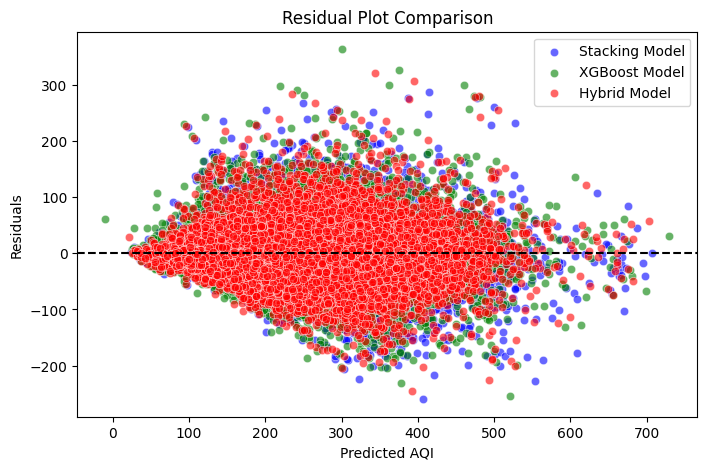

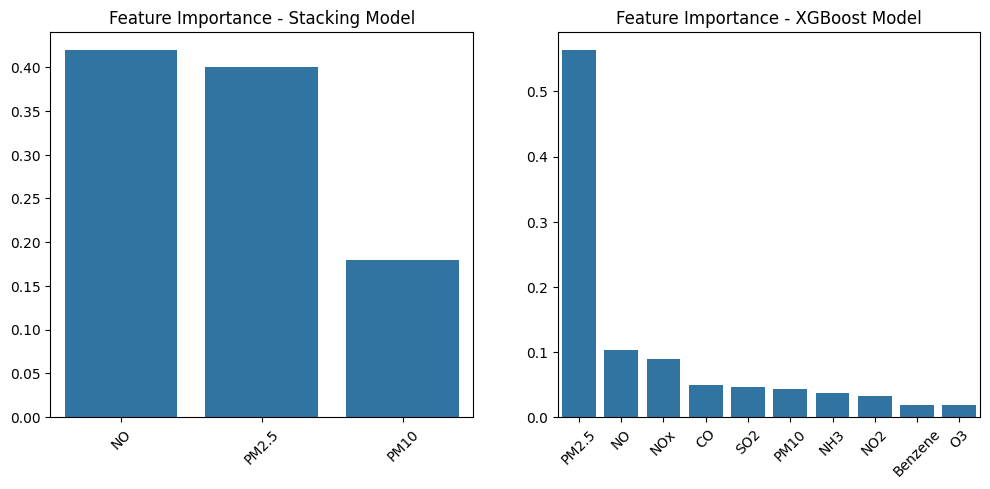

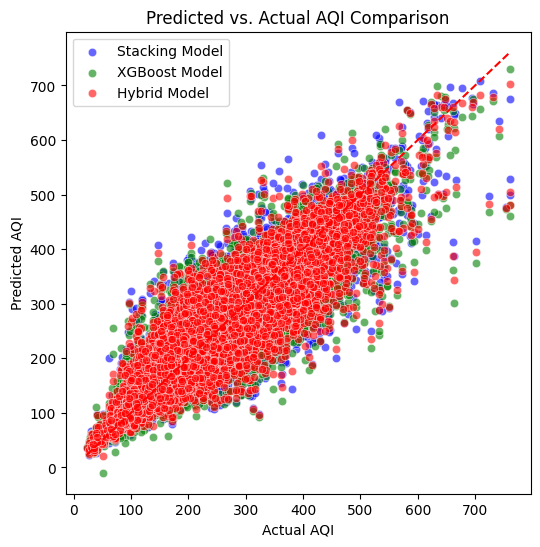

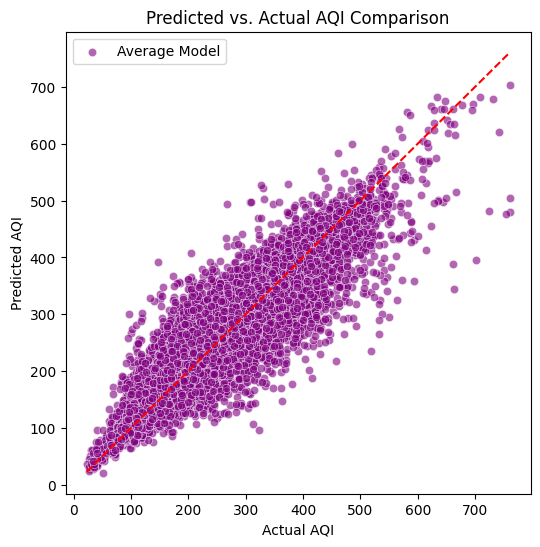

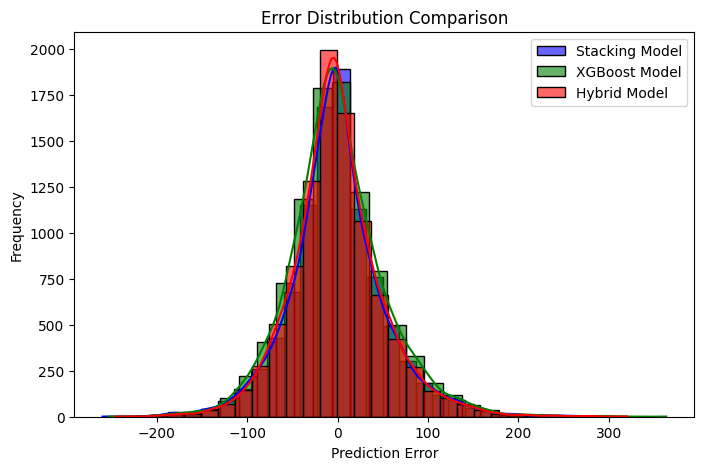

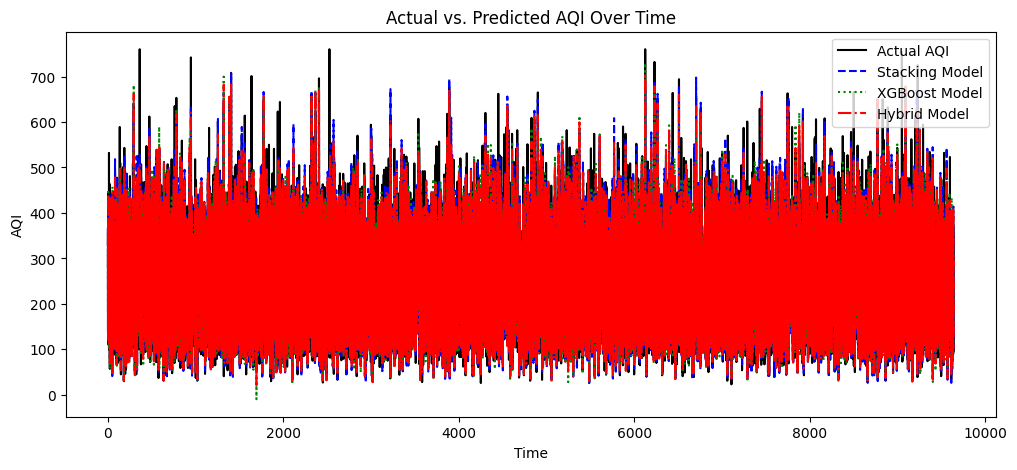

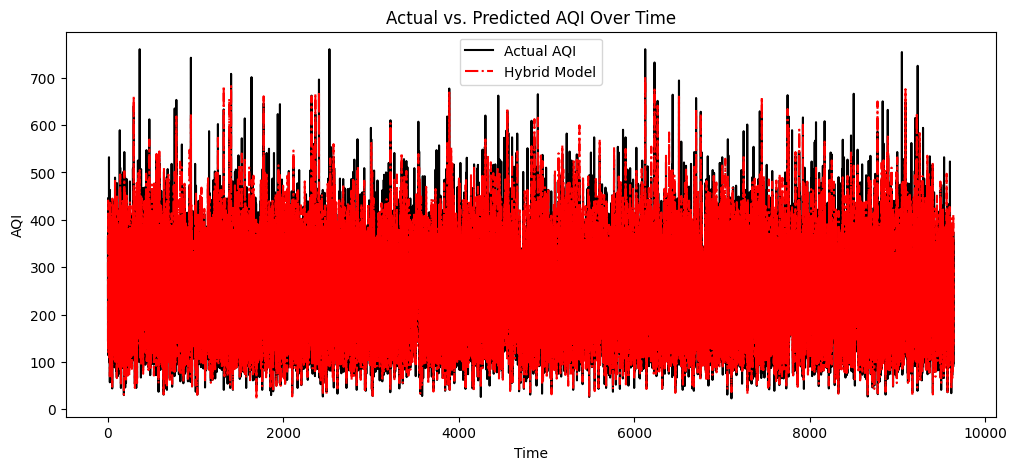

In [ ]:
plot_residuals(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_feature_importance(stack_model, xgb_model, feature_cols)
plot_predicted_vs_actual(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_predicted_vs_actual_avg(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_error_distribution(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_time_series(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_ts(y_test, final_predictions)

In [ ]:
final_predictions, stack_predictions, xgb_predictions, stack_model, xgb_model = Stacking_RF_AdaBoost_XTR_XGB_Model(X_train_arima, y_train, X_test_arima, y_test)


Hybrid Model Evaluation (Random Forest + AdaBoost + Extra Trees + XGBoost):
Mean Squared Error (MSE): 2249.7899857622
Mean Absolute Error (MAE): 34.1351517142
Explained Variance Score (EVS): 0.8483794511
R-squared (R²): 0.8483793177
Max Error: 383.7610052490
Mean Relative Error (MRE): 0.1493348967
Mean Absolute Percentage Error (MAPE): 14.9334896651
Symmetric Mean Absolute Percentage Error (SMAPE): 14.2495404024
Mean Absolute Scaled Error (MASE): inf


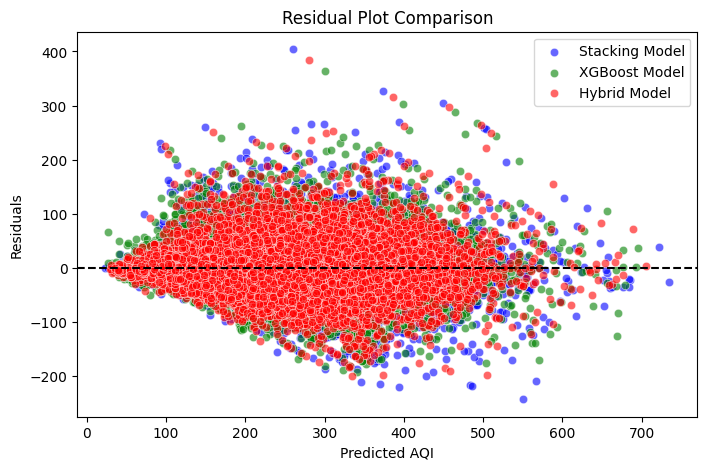

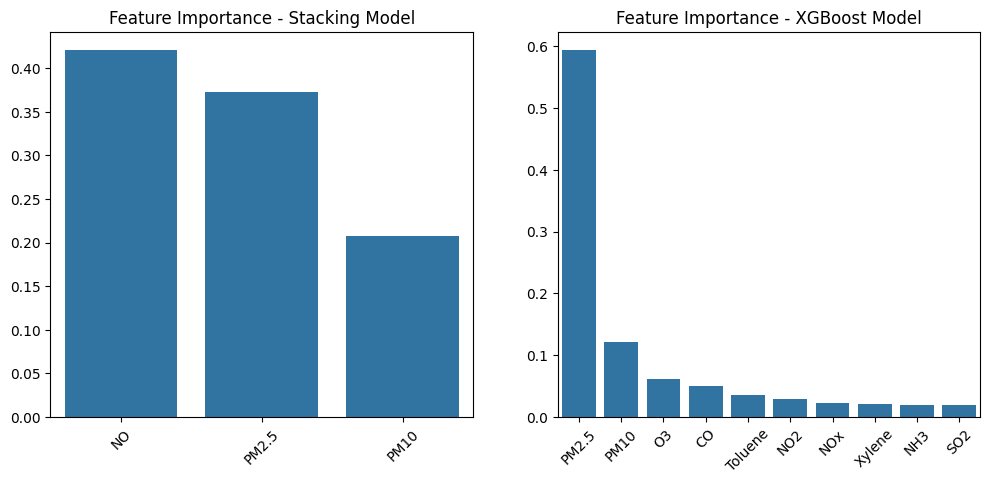

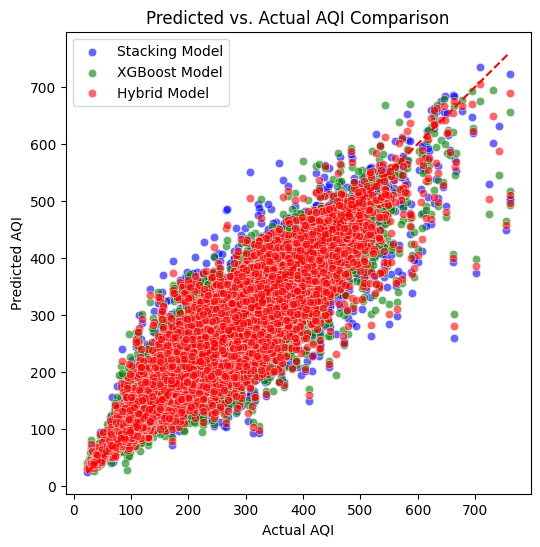

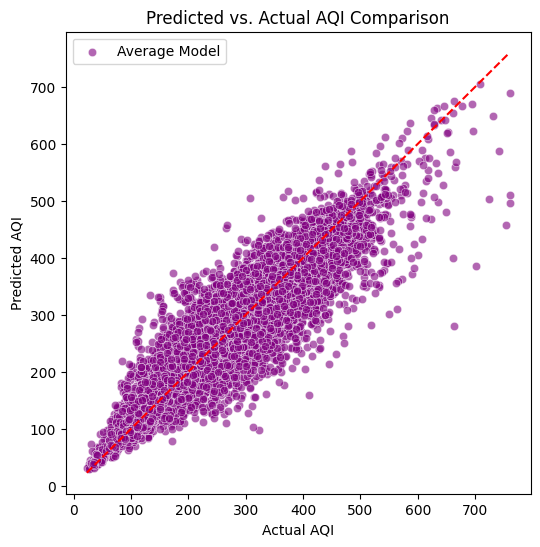

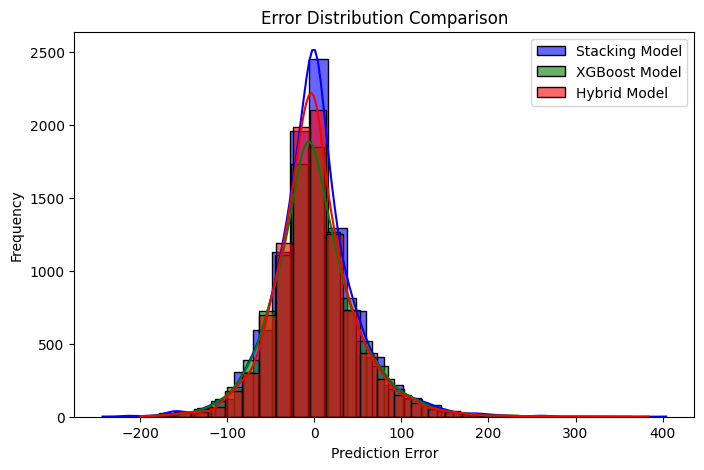

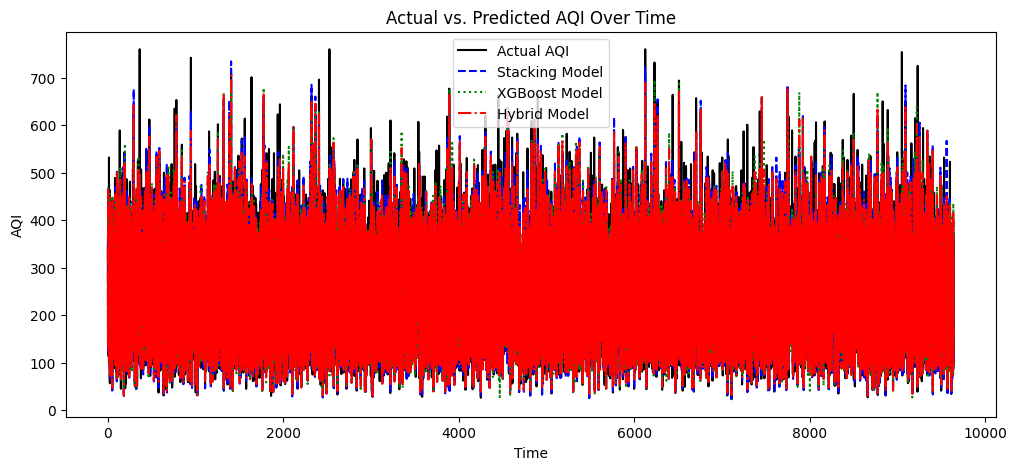

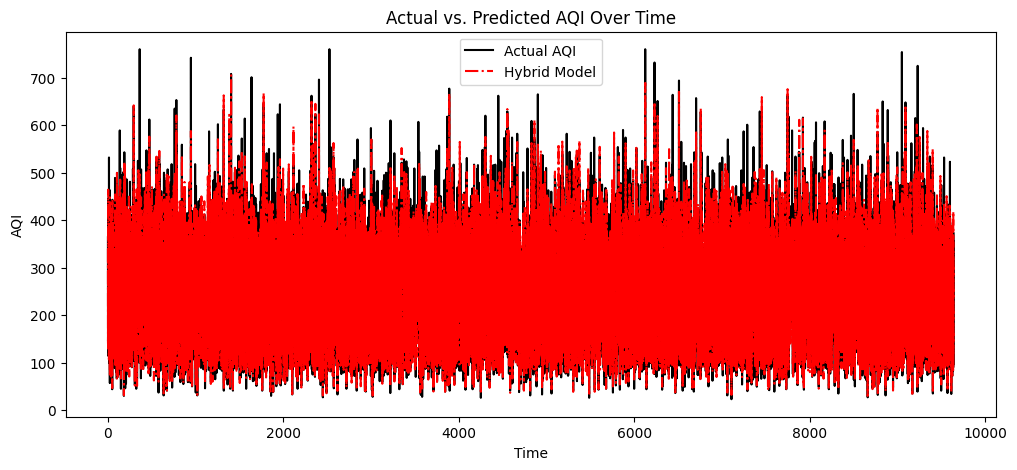

In [ ]:
plot_residuals(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_feature_importance(stack_model, xgb_model, feature_cols)
plot_predicted_vs_actual(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_predicted_vs_actual_avg(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_error_distribution(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_time_series(y_test, stack_predictions, xgb_predictions, final_predictions)
plot_ts(y_test, final_predictions)

### Random Forest + ETR [Model - 1]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_residuals(y_test, rf_predictions, et_predictions, hybrid_predictions):
    residuals_rf = y_test - rf_predictions
    residuals_et = y_test - et_predictions
    residuals_hybrid = y_test - hybrid_predictions

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=rf_predictions, y=residuals_rf, alpha=0.6, label="Random Forest", color="blue")
    sns.scatterplot(x=et_predictions, y=residuals_et, alpha=0.6, label="Extra Trees", color="green")
    sns.scatterplot(x=hybrid_predictions, y=residuals_hybrid, alpha=0.6, label="Hybrid Model", color="red")
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel("Predicted AQI")
    plt.ylabel("Residuals")
    plt.title("Residual Plot Comparison")
    plt.legend()
    plt.show()

def plot_feature_importance(rf_model, et_model, feature_names):
    rf_importances = rf_model.feature_importances_
    et_importances = et_model.feature_importances_

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    rf_indices = np.argsort(rf_importances)[::-1]
    sns.barplot(x=np.array(feature_names)[rf_indices][:10], y=rf_importances[rf_indices][:10], ax=axes[0])
    axes[0].set_title("Feature Importance - Random Forest")
    axes[0].set_xticklabels(np.array(feature_names)[rf_indices][:10], rotation=45)

    et_indices = np.argsort(et_importances)[::-1]
    sns.barplot(x=np.array(feature_names)[et_indices][:10], y=et_importances[et_indices][:10], ax=axes[1])
    axes[1].set_title("Feature Importance - Extra Trees")
    axes[1].set_xticklabels(np.array(feature_names)[et_indices][:10], rotation=45)

    plt.show()

def plot_predicted_vs_actual(y_test, rf_predictions, et_predictions, hybrid_predictions):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=rf_predictions, alpha=0.6, label="Random Forest", color="blue")
    sns.scatterplot(x=y_test, y=et_predictions, alpha=0.6, label="Extra Trees", color="green")
    sns.scatterplot(x=y_test, y=hybrid_predictions, alpha=0.6, label="Hybrid Model", color="red")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.title("Predicted vs. Actual AQI Comparison")
    plt.legend()
    plt.show()

def plot_predicted_vs_actual_avg(y_test, rf_predictions, et_predictions, hybrid_predictions):
    plt.figure(figsize=(6, 6))
    avg = (rf_predictions + et_predictions + hybrid_predictions) / 3
    sns.scatterplot(x=y_test, y=avg, alpha=0.6, label="Average Model", color="purple")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.title("Predicted vs. Actual AQI Comparison")
    plt.legend()
    plt.show()

def plot_error_distribution(y_test, rf_predictions, et_predictions, hybrid_predictions):
    errors_rf = y_test - rf_predictions
    errors_et = y_test - et_predictions
    errors_hybrid = y_test - hybrid_predictions

    plt.figure(figsize=(8, 5))
    sns.histplot(errors_rf, bins=30, kde=True, color="blue", label="Random Forest", alpha=0.6)
    sns.histplot(errors_et, bins=30, kde=True, color="green", label="Extra Trees", alpha=0.6)
    sns.histplot(errors_hybrid, bins=30, kde=True, color="red", label="Hybrid Model", alpha=0.6)
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.title("Error Distribution Comparison")
    plt.legend()
    plt.show()

def plot_time_series(y_test, rf_predictions, et_predictions, hybrid_predictions):
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values, label="Actual AQI", color='black')
    plt.plot(rf_predictions, label="Random Forest", color='blue', linestyle='dashed')
    plt.plot(et_predictions, label="Extra Trees", color='green', linestyle='dotted')
    plt.plot(hybrid_predictions, label="Hybrid Model", color='red', linestyle='dashdot')
    plt.xlabel("Time")
    plt.ylabel("AQI")
    plt.title("Actual vs. Predicted AQI Over Time")
    plt.legend()
    plt.show()

def plot_ts(y_test, hybrid_predictions):
    plt.figure(figsize=(12, 5))
    plt.plot(y_test.values, label="Actual AQI", color='black')
    plt.plot(hybrid_predictions, label="Hybrid Model", color='red', linestyle='dashdot')
    plt.xlabel("Time")
    plt.ylabel("AQI")
    plt.title("Actual vs. Predicted AQI Over Time")
    plt.legend()
    plt.show()


In [ ]:
def HybridModel(X_train_pca, y_train, X_test_pca, y_test):
    # Initialize Random Forest and Extra Trees Regressors
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

    # Train both models on the training data
    rf_model.fit(X_train_pca, y_train)
    et_model.fit(X_train_pca, y_train)

    # Predict using both models
    rf_predictions = rf_model.predict(X_test_pca)
    et_predictions = et_model.predict(X_test_pca)

    # Combine predictions (average blending)
    hybrid_predictions = (rf_predictions + et_predictions) / 2

    # Evaluate the hybrid model using standard and custom metrics
    reg_mse = mean_squared_error(y_test, hybrid_predictions)  # Mean Squared Error
    reg_mae = mean_absolute_error(y_test, hybrid_predictions)  # Mean Absolute Error
    reg_evs = explained_variance_score(y_test, hybrid_predictions)  # Explained Variance Score
    reg_max_error = np.max(np.abs(y_test - hybrid_predictions))  # Max Error
    reg_mre = mean_relative_error(y_test, hybrid_predictions)  # Mean Relative Error
    reg_mape = mean_absolute_percentage_error(y_test, hybrid_predictions)  # Mean Absolute Percentage Error
    reg_smape = symmetric_mean_absolute_percentage_error(y_test, hybrid_predictions)  # Symmetric MAPE
    reg_mase = mean_absolute_scaled_error(y_test, hybrid_predictions)  # Mean Absolute Scaled Error
    reg_r2 = r2_score(y_test, hybrid_predictions)  # R-squared

    # Print results
    print("\nHybrid Model Evaluation (Random Forest + Extra Trees):")
    print(f"Mean Squared Error (MSE): {reg_mse:.10f}")
    print(f"Mean Absolute Error (MAE): {reg_mae:.10f}")
    print(f"Explained Variance Score (EVS): {reg_evs:.10f}")
    print(f"Max Error: {reg_max_error:.10f}")
    print(f"Mean Relative Error (MRE): {reg_mre:.10f}")
    print(f"Mean Absolute Percentage Error (MAPE): {reg_mape:.10f}")
    print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {reg_smape:.10f}")
    print(f"Mean Absolute Scaled Error (MASE): {reg_mase:.10f}")
    print(f"R-squared (R²): {reg_r2:.10f}")

    return hybrid_predictions, rf_predictions, et_predictions, rf_model, et_model


Hybrid Model Evaluation (Random Forest + Extra Trees):
Mean Squared Error (MSE): 2545.6079675408
Mean Absolute Error (MAE): 36.5723121751
Explained Variance Score (EVS): 0.8285685172
Max Error: 338.6950000000
Mean Relative Error (MRE): 0.1644968098
Mean Absolute Percentage Error (MAPE): 16.4496809828
Symmetric Mean Absolute Percentage Error (SMAPE): 15.3333457532
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8284431794


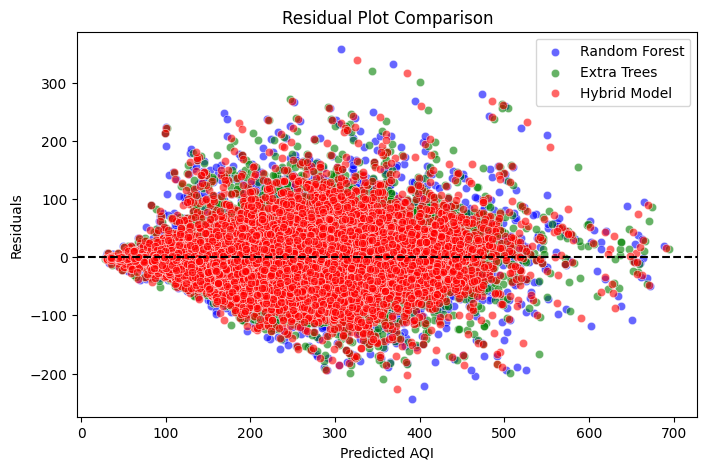

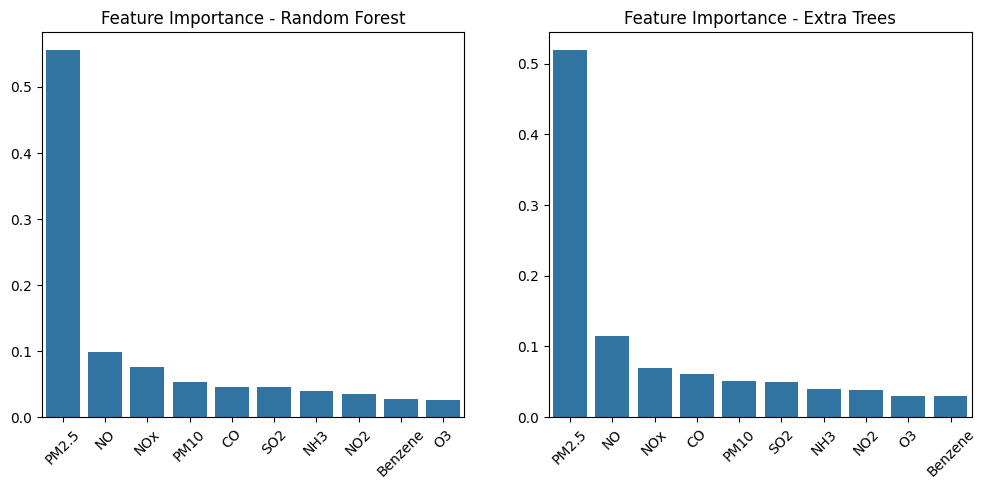

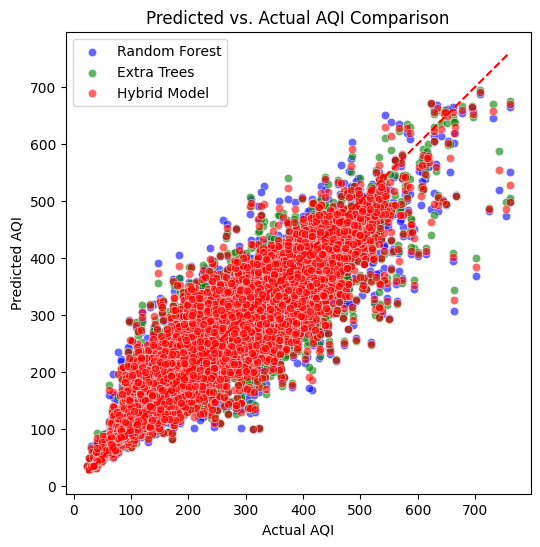

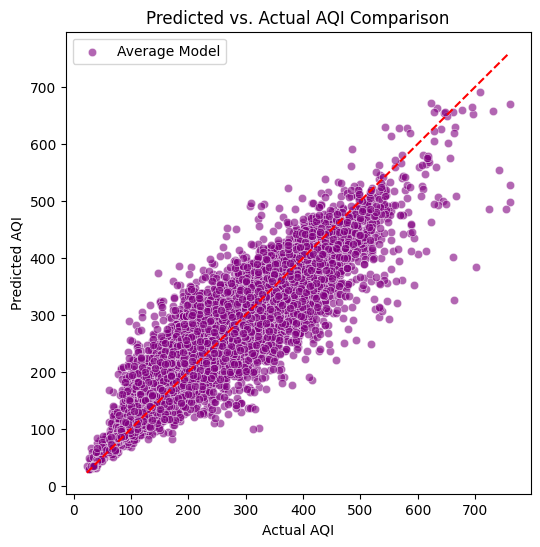

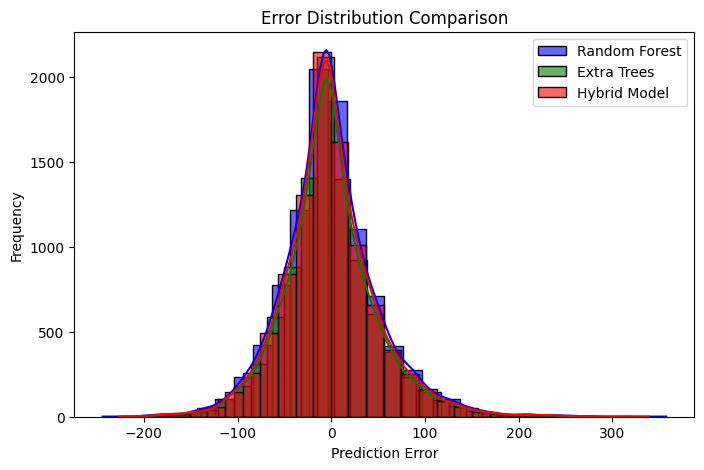

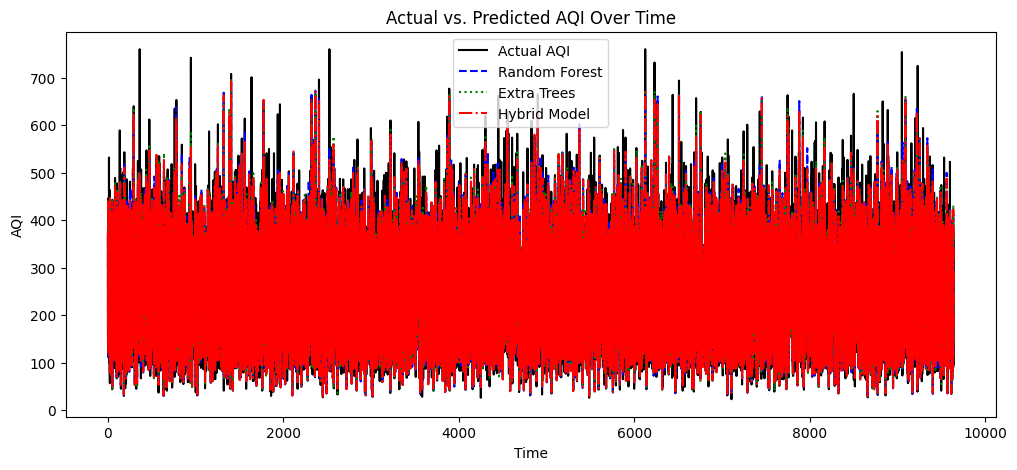

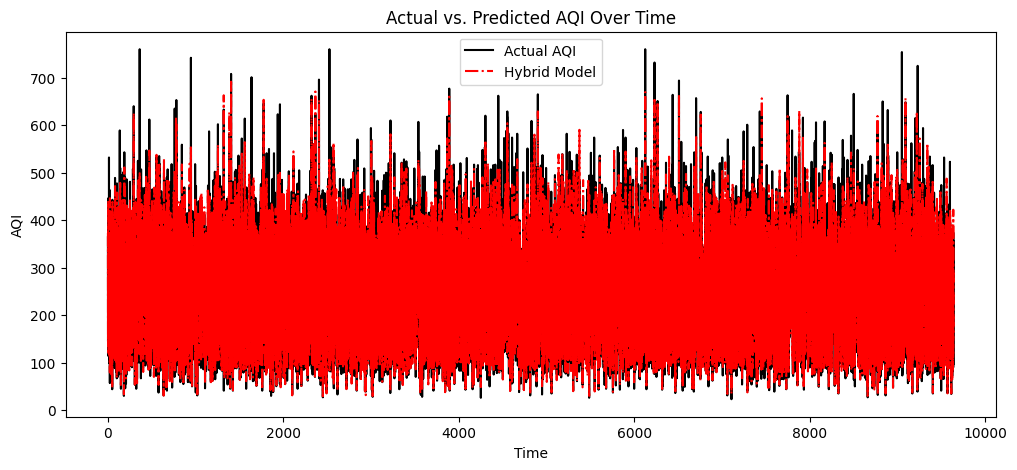

In [ ]:
hybrid_predictions, rf_predictions, et_predictions, rf_model, et_model = HybridModel(X_train_pca, y_train, X_test_pca, y_test)

plot_residuals(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_feature_importance(rf_model, et_model, feature_cols)
plot_predicted_vs_actual(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_predicted_vs_actual_avg(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_error_distribution(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_time_series(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_ts(y_test, hybrid_predictions)


Hybrid Model Evaluation (Random Forest + Extra Trees):
Mean Squared Error (MSE): 2200.8071893935
Mean Absolute Error (MAE): 33.4194370858
Explained Variance Score (EVS): 0.8517359794
Max Error: 323.3050000000
Mean Relative Error (MRE): 0.1466112242
Mean Absolute Percentage Error (MAPE): 14.6611224221
Symmetric Mean Absolute Percentage Error (SMAPE): 13.8351113600
Mean Absolute Scaled Error (MASE): inf
R-squared (R²): 0.8516804280


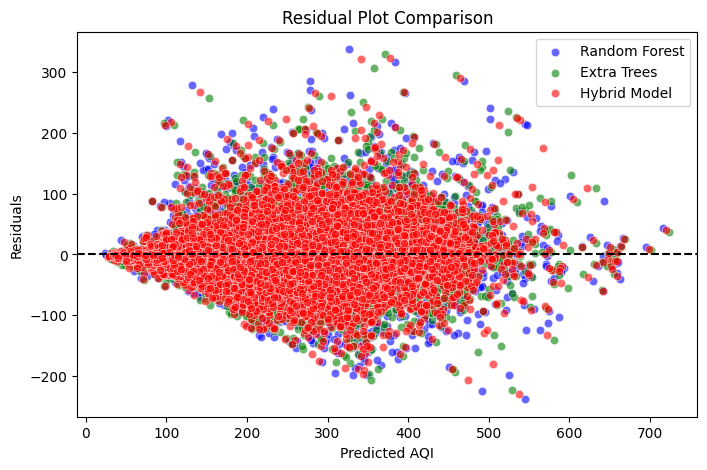

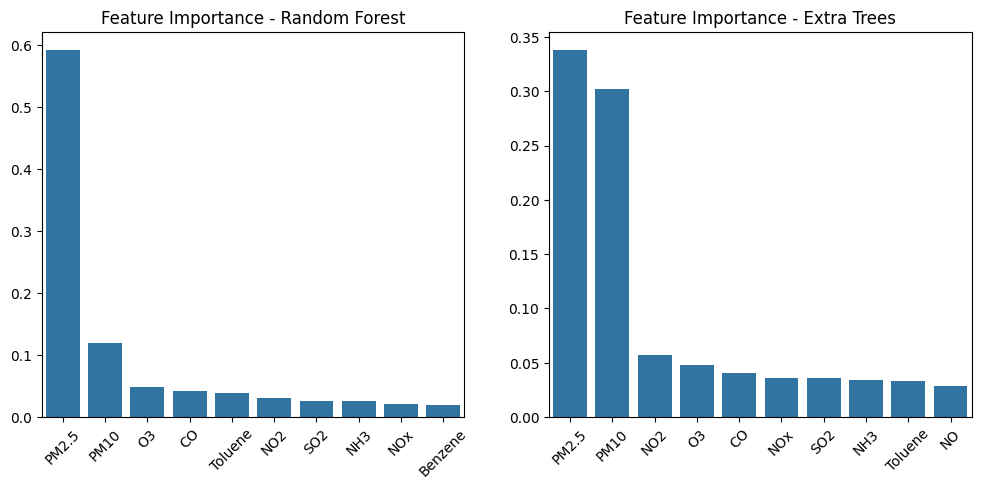

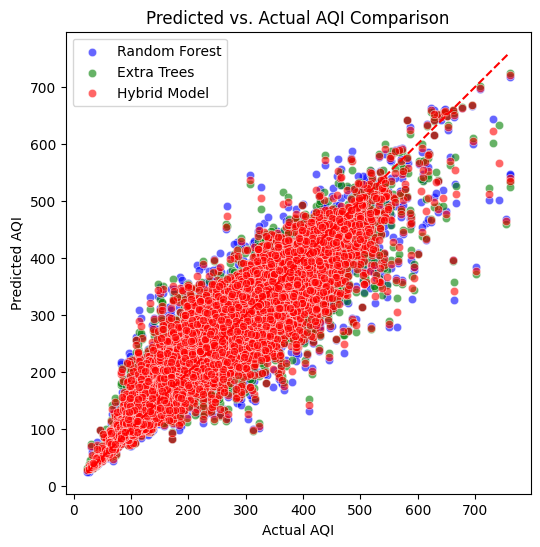

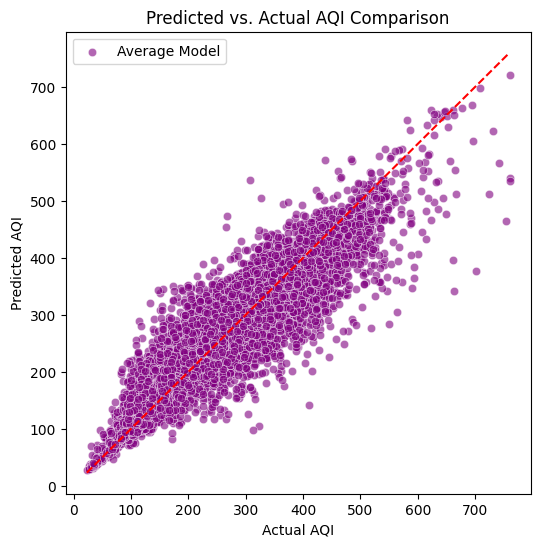

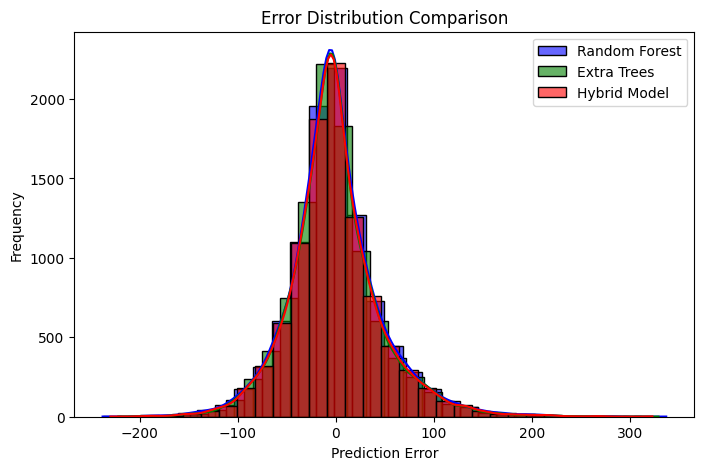

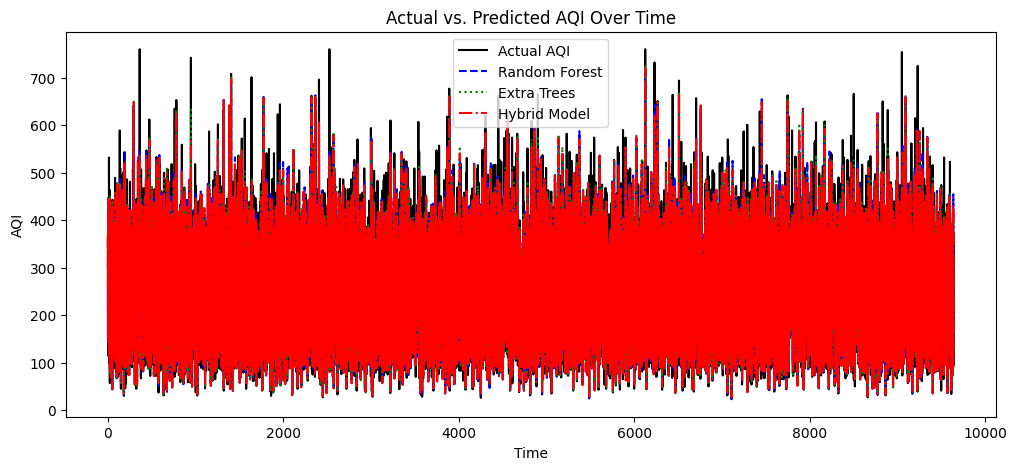

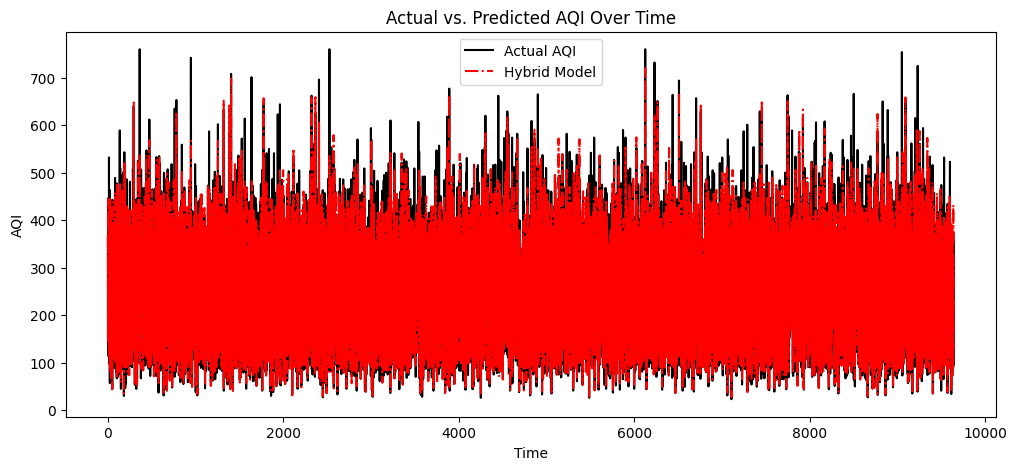

In [ ]:
hybrid_predictions, rf_predictions, et_predictions, rf_model, et_model = HybridModel(X_train_arima, y_train, X_test_arima, y_test)

plot_residuals(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_feature_importance(rf_model, et_model, feature_cols)
plot_predicted_vs_actual(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_predicted_vs_actual_avg(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_error_distribution(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_time_series(y_test, rf_predictions, et_predictions, hybrid_predictions)
plot_ts(y_test, hybrid_predictions)
